<a href="https://colab.research.google.com/github/cdbolivarz/Accidentality_Predictions_Medellin/blob/master/Limpieza__y_formato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpieza y formato de datos
En este documento, se realiza el preprocesamiento de los datos obtenidos de los documentos de incidentes georeferenciados.

In [83]:
print('prueba daniela')

prueba daniela


Librerias

In [ ]:
# !pip install holidays_co
import pandas as pd
import glob
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
# import holidays_co

### Lectura de datos

In [ ]:
all_files = glob.glob("dataset/I*.csv")

li = []

for filename in all_files:

    frame = pd.read_csv(filename, index_col=None, header=0, low_memory=False)
    li.append(frame)

df = pd.concat(li, axis=0, ignore_index=True)
df = df.sort_values(by=["FECHA"])

df.head()

,X,Y,OBJECTID,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,DIRECCION_ENC,CBML,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE,X_MAGNAMED,Y_MAGNAMED,LONGITUD,LATITUD
183023,-75.587934,6.278224,211364,1424506,2014/01/01 00:00:00+00,08:30:00,1,2014,Choque,Dg 80 CL 77 AC,DG 080 077 AC 000 00000,0706,Malla vial cruce invertido,SOLO DAÑOS,La Pilarica,Robledo,Tramo de via,MIÉRCOLES,1,NaN,832827.72,1186238.66,-75.587934,6.278224
182998,-75.555400,6.252163,211339,1424101,2014/01/01 00:00:00+00,08:50:00,1,2014,Choque,CR 39 CL 60,CR 039 060 000 00000,0803,Malla vial,HERIDO,San Miguel,Villa Hermosa,Tramo de via,MIÉRCOLES,1,NaN,836428.72,1183355.92,-75.555400,6.252163
182997,-75.564683,6.249282,211338,1424096,2014/01/01 00:00:00+00,08:00:00,1,2014,Otro,CL 52 CR 46,CL 052 046 000 00000,1019,Malla vial,HERIDO,La Candelaria,La Candelaria,Tramo de via,MIÉRCOLES,1,NaN,835401.20,1183037.23,-75.564683,6.249282
182996,-75.557573,6.235498,211337,1424032,2014/01/01 00:00:00+00,10:00:00,1,2014,Choque,CR 32 CL 40,CR 032 040 000 00000,0910,Malla vial,HERIDO,La Milagrosa,Buenos Aires,Tramo de via,MIÉRCOLES,1,NaN,836188.24,1181512.51,-75.557573,6.235498
182995,-75.703816,6.221806,211336,1424027,2014/01/01 00:00:00+00,11:30:00,1,2014,Otro,CL 66 CR 121,CL 066 121 000 00000,NaN,No Ubicada,HERIDO,NaN,NaN,Tramo de via,MIÉRCOLES,1,NaN,820000.00,1180000.00,-75.703816,6.221806


Que columnas tienen valores nulos

In [ ]:
df.isna().any()

X                False
Y                False
OBJECTID         False
RADICADO          True
FECHA            False
HORA             False
DIA              False
PERIODO          False
CLASE             True
DIRECCION        False
DIRECCION_ENC     True
CBML              True
TIPO_GEOCOD      False
GRAVEDAD         False
BARRIO            True
COMUNA            True
DISENO            True
DIA_NOMBRE       False
MES              False
MES_NOMBRE        True
X_MAGNAMED       False
Y_MAGNAMED       False
LONGITUD         False
LATITUD          False
dtype: bool

Formato datos

In [ ]:
#Eliminar filas con NA y columnas que no consideramos importantes para el modelo.
#Asignar mismos nombres a los tipos de accidentes (CLASE)
def format(df):
  df = df.drop(['X', 'Y', 'OBJECTID', 'RADICADO', 'DIRECCION', 'DIRECCION_ENC',
              'CBML', 'TIPO_GEOCOD', 'DISENO', 'MES_NOMBRE', 'X_MAGNAMED',
              'Y_MAGNAMED'], axis=1)
  df = df.dropna(subset=['CLASE', 'BARRIO', 'COMUNA'])

  df["CLASE"].replace({"Caída de Ocupante": "Caida Ocupante",
                       "Caida de Ocupante": "Caida Ocupante",
                       "Caída Ocupante": "Caida Ocupante",
                       "Choque ": "Choque"}, inplace=True)

  return df

df = format(df)
df.columns = df.columns.str.lower()
df = df.reset_index()
df = df.drop(['index'],axis=1)
df.head()

,fecha,hora,dia,periodo,clase,gravedad,barrio,comuna,dia_nombre,mes,longitud,latitud
0,2014/01/01 00:00:00+00,08:30:00,1,2014,Choque,SOLO DAÑOS,La Pilarica,Robledo,MIÉRCOLES,1,-75.587934,6.278224
1,2014/01/01 00:00:00+00,08:50:00,1,2014,Choque,HERIDO,San Miguel,Villa Hermosa,MIÉRCOLES,1,-75.555400,6.252163
2,2014/01/01 00:00:00+00,08:00:00,1,2014,Otro,HERIDO,La Candelaria,La Candelaria,MIÉRCOLES,1,-75.564683,6.249282
3,2014/01/01 00:00:00+00,10:00:00,1,2014,Choque,HERIDO,La Milagrosa,Buenos Aires,MIÉRCOLES,1,-75.557573,6.235498
4,2014/01/01 00:00:00+00,04:20:00,1,2014,Atropello,HERIDO,San Pablo,Popular,MIÉRCOLES,1,-75.546130,6.290196


## Fechas

Primero se cambia el timpo de la comuna *fecha* por el tipo **datetime**

In [ ]:
fechas = df['fecha']
df['fecha'] = pd.to_datetime(fechas)

Luego se crea la columna *dia_anno* para saber a que dia del año pertenece cada fila y la columna semana donde va la semana del año


In [ ]:
df['dia_anno']=df['fecha'].dt.dayofyear
df['semana']=df['fecha'].dt.isocalendar().week

In [ ]:
df.head()

,fecha,hora,dia,periodo,clase,gravedad,barrio,comuna,dia_nombre,mes,longitud,latitud,dia_anno,semana
0,2014-01-01 00:00:00+00:00,08:30:00,1,2014,Choque,SOLO DAÑOS,La Pilarica,Robledo,MIÉRCOLES,1,-75.587934,6.278224,1,1
1,2014-01-01 00:00:00+00:00,08:50:00,1,2014,Choque,HERIDO,San Miguel,Villa Hermosa,MIÉRCOLES,1,-75.555400,6.252163,1,1
2,2014-01-01 00:00:00+00:00,08:00:00,1,2014,Otro,HERIDO,La Candelaria,La Candelaria,MIÉRCOLES,1,-75.564683,6.249282,1,1
3,2014-01-01 00:00:00+00:00,10:00:00,1,2014,Choque,HERIDO,La Milagrosa,Buenos Aires,MIÉRCOLES,1,-75.557573,6.235498,1,1
4,2014-01-01 00:00:00+00:00,04:20:00,1,2014,Atropello,HERIDO,San Pablo,Popular,MIÉRCOLES,1,-75.546130,6.290196,1,1


Haciendo uso de la libreria _**holidays_co**_ se creo un archivo *festivos.csv* que contiene las fechas y si la fecha es festivo o no, para hacer un join con el dataframe actual, ya que la ejecucion de esta libreria toma al rededor de 5min

In [ ]:
# codigo empleadon holidays_co
# def festivo(row):
#     row['festivo'] = holidays_co.is_holiday_date(row['fecha'])
#     return row
# dfcopy = dfcopy.apply(festivo, axis=1)

In [ ]:
festivos = pd.read_csv('dataset/festivos.csv')
df = df.join(festivos['festivo'])

Filas con errores ortograficos en algunas columnas

In [ ]:
df['comuna'].drop_duplicates()

0               Robledo
1         Villa Hermosa
2         La Candelaria
3          Buenos Aires
4               Popular
              ...      
167617        Altavista
167800         Girardot
167801     Barrio Colón
167924       Campo Amor
168043        Andalucía
Name: comuna, Length: 84, dtype: object

In [ ]:
df['barrio'].drop_duplicates()

0              La Pilarica
1               San Miguel
2            La Candelaria
3             La Milagrosa
4                San Pablo
                ...       
187691            El Uvito
188971                7001
189042                9004
195134    Volcana Guayabal
201372             El Plan
Name: barrio, Length: 339, dtype: object

In [ ]:
df.head()

,fecha,hora,dia,periodo,clase,gravedad,barrio,comuna,dia_nombre,mes,longitud,latitud,dia_anno,semana,festivo
0,2014-01-01 00:00:00+00:00,08:30:00,1,2014,Choque,SOLO DAÑOS,La Pilarica,Robledo,MIÉRCOLES,1,-75.587934,6.278224,1,1,True
1,2014-01-01 00:00:00+00:00,08:50:00,1,2014,Choque,HERIDO,San Miguel,Villa Hermosa,MIÉRCOLES,1,-75.555400,6.252163,1,1,True
2,2014-01-01 00:00:00+00:00,08:00:00,1,2014,Otro,HERIDO,La Candelaria,La Candelaria,MIÉRCOLES,1,-75.564683,6.249282,1,1,True
3,2014-01-01 00:00:00+00:00,10:00:00,1,2014,Choque,HERIDO,La Milagrosa,Buenos Aires,MIÉRCOLES,1,-75.557573,6.235498,1,1,True
4,2014-01-01 00:00:00+00:00,04:20:00,1,2014,Atropello,HERIDO,San Pablo,Popular,MIÉRCOLES,1,-75.546130,6.290196,1,1,True


In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
len(df['barrio'].drop_duplicates())

339

Todos las columnas de *clase, gravedad, barrio, comuna, dia_nombre* se pasaron a miniuscula para evitar posibles inconveniesntes futuros

In [ ]:
df['clase'] = df['clase'].str.lower()
df['gravedad'] = df['gravedad'].str.lower()
df['barrio'] = df['barrio'].str.lower()
df['comuna'] = df['comuna'].str.lower()
df['dia_nombre'] = df['dia_nombre'].str.lower()

## Barrios


Se eliminan las filas donde el barrio sale como un número

In [ ]:
for barrio in df['barrio']:
    try:
        int(barrio)
        df = df.replace({'barrio': barrio}, np.nan)
    except:
        pass
df= df.dropna(subset=['barrio'])

Para corregir los barrios donde salía **no. #**  para que salga **no.#**

In [ ]:
def error_no(row):
    barrio = row['barrio'].strip()
    b = bool(re.search(r'(no)\. \d', barrio))
    if (b):
        b = barrio.split()
        barrio = ' '.join(b[0:-2])
        barrio += ' '+b[-2]+b[-1]
    row['barrio'] = barrio
    return row
df = df.apply(error_no,axis=1)

In [ ]:
# Barrios con problemas
# en Medellin se supone hay 275 barrio (segun wikipedia)

# hay varios suburbanos que me parecen raros
# el barrio 'u.p.b'
# creo que todos los barrios que se llaman universidad algo estan mal (el de falcultad de minas existe)


In [ ]:
df = df.replace({'barrio':{'barrio de jesús':'barrios de jesús',
                                   'berlin':'berlín',
                                   'inst':np.nan,
                                   'loma de los bernal':'la loma de los bernal',
                                   'villa liliam':'villa lilliam'}})

In [ ]:
barrios = df['barrio'].sort_values().unique()


In [ ]:
len(barrios)

317

## Comunas

In [ ]:
# 1	Comuna 1 - Popular
# 2	Comuna 2 - Santa Cruz
# 3	Comuna 3 - Manrique
# 4	Comuna 4 - Aranjuez
# 5	Comuna 5 - Castilla
# 6	Comuna 6 - Doce de Octubre
# 7	Comuna 7 - Robledo
# 8	Comuna 8 - Villa Hermosa
# 9	Comuna 9 - Buenos Aires
# 10 Comuna 10 - La Candelaria
# 11 Comuna 11 - Laureles-Estadio
# 12 Comuna 12 - La América
# 13 Comuna 13 - San Javier
# 14 Comuna 14 - El Poblado
# 15 Comuna 15 - Guayabal
# 16 Comuna 16 - Belén

In [ ]:
df = df.replace({'comuna':{ 'alejandro echavarría': 'buenos aires',
                                    'alfonso lópez':'castilla',
                                    'altavista':'belén',
                                    'andalucía':'santa cruz',
                                    'antonio nariño':'san javier',
                                    'au':np.nan,
                                    'barrio colón':'la candelaria',
                                    'bolivariana':'laureles-estadio',
                                    'boston':'la candelaria',
                                    'cabecera san antonio de prado':'corregimiento san antorio de prado',
                                    'calasanz':'la américa',
                                    'calle nueva':'la candelaria',
                                    'campo amor':'guayabal',
                                    'campo valdés no. 1':'aranjuez',
                                    'campo valdés no. 2':'manrique',
                                    'caribe':'castilla',
                                    'cerro nutibara':'belén',
                                    'corazón de jesús':'la candelaria',
                                    'cristo rey':'guayabal',
                                    'el chagualo':'la candelaria',
                                    'el nogal-los almendros':'belén',
                                    'el raizal':'manrique',
                                    'estación villa':'la candelaria',
                                    'florida nueva':'laureles-estadio',
                                    'fátima':'belén',
                                    'girardot':'castilla',
                                    'guayaquil':'la candelaria',
                                    'héctor abad gómez':'castilla'}})

In [ ]:
df = df.replace({'comuna':{'in':np.nan, 
                                'jesús nazareno':'la candelaria',
                                'la alpujarra':np.nan,
                                'la colina':'guayabal',
                                'la floresta':'la américa',
                                'la rosa':'santa cruz',
                                'las esmeraldas':'aranjuez',
                                'las granjas':'manrique',
                                'las palmas':'la candelaria',
                                'las playas':'belén',
                                'laureles':'laureles-estadio',
                                'laureles estadio':'laureles-estadio', 
                                'los conquistadores':'laureles-estadio',
                                'los mangos':'villa hermosa',
                                'manila':'el poblado',
                                'miranda':'aranjuez',
                                'moravia':'aranjuez',
                                'naranjal':'laureles-estadio',
                                'oleoducto':np.nan,
                                'parque juan pablo ii':'buenos aires',
                                'patio bonito':'el poblado',
                                'perpetuo socorro':'la candelaria',
                                'rosales':'belén',
                                'san pedro':'aranjuez',
                                'santa fé':'guayabal',
                                'santa inés':'manrique',
                                'santa maría de los ángeles':'el poblado',
                                'simón bolívar':'la américa',
                                'sn':np.nan,
                                'suramericana':'laureles-estadio',
                                'toscana':'castilla',
                                'universidad de antioquia':np.nan,
                                'veinte de julio':'san javier',
                                'villa carlota':'el poblado',
                                'villa guadalupe':'popular'}})

In [ ]:
comunas = df['comuna'].sort_values().unique()
comunas

array(['aranjuez', 'belén', 'buenos aires', 'castilla',
       'corregimiento de altavista',
       'corregimiento de san antonio de prado',
       'corregimiento de san cristóbal',
       'corregimiento de san sebastián de palmitas',
       'corregimiento de santa elena',
       'corregimiento san antorio de prado', 'doce de octubre',
       'el poblado', 'guayabal', 'la américa', 'la candelaria',
       'laureles-estadio', 'manrique', 'popular', 'robledo', 'san javier',
       'santa cruz', 'villa hermosa', nan], dtype=object)

## Longitud y latitud

Para ver que tal estan los valores de longitud y latitud se realiza un grafico para ver que puntos estan más alejados dependiendo de la comuna que tienen

In [ ]:
# colores = ['blue','red','green','cyan','yellow','orange','black','pink','purple']
colores = ['#F3E9DC','#C08552','#5E3023','#9EADC8','#DAB49D','#40798C','#EC058E',
           '#386C0B','#462255','#C3F3C0','#7B0D1E','#01FDF6','#E9DF00','#FB5012','#EC9A29','#2176FF']
dic = {
    'popular':0,
    'santa cruz':1,
    'manrique':2,
    'aranjuez':3,
    'castilla':4,
    'doce de octubre':5,
    'robledo':6,
    'villa hermosa':7,
    'buenos aires':8,
    'la candelaria':9,
    'laureles-estadio':10,
    'la américa':11,
    'san javier':12,
    'el poblado':13,
    'guayabal':14,
    'belén':15
}
asignacion = []
for row in df['comuna'].values:
    try:
        asignacion.append(colores[dic[row]])
    except:
        asignacion.append('black')

El el grafico se puede ver que hay puntos negros dentro de 

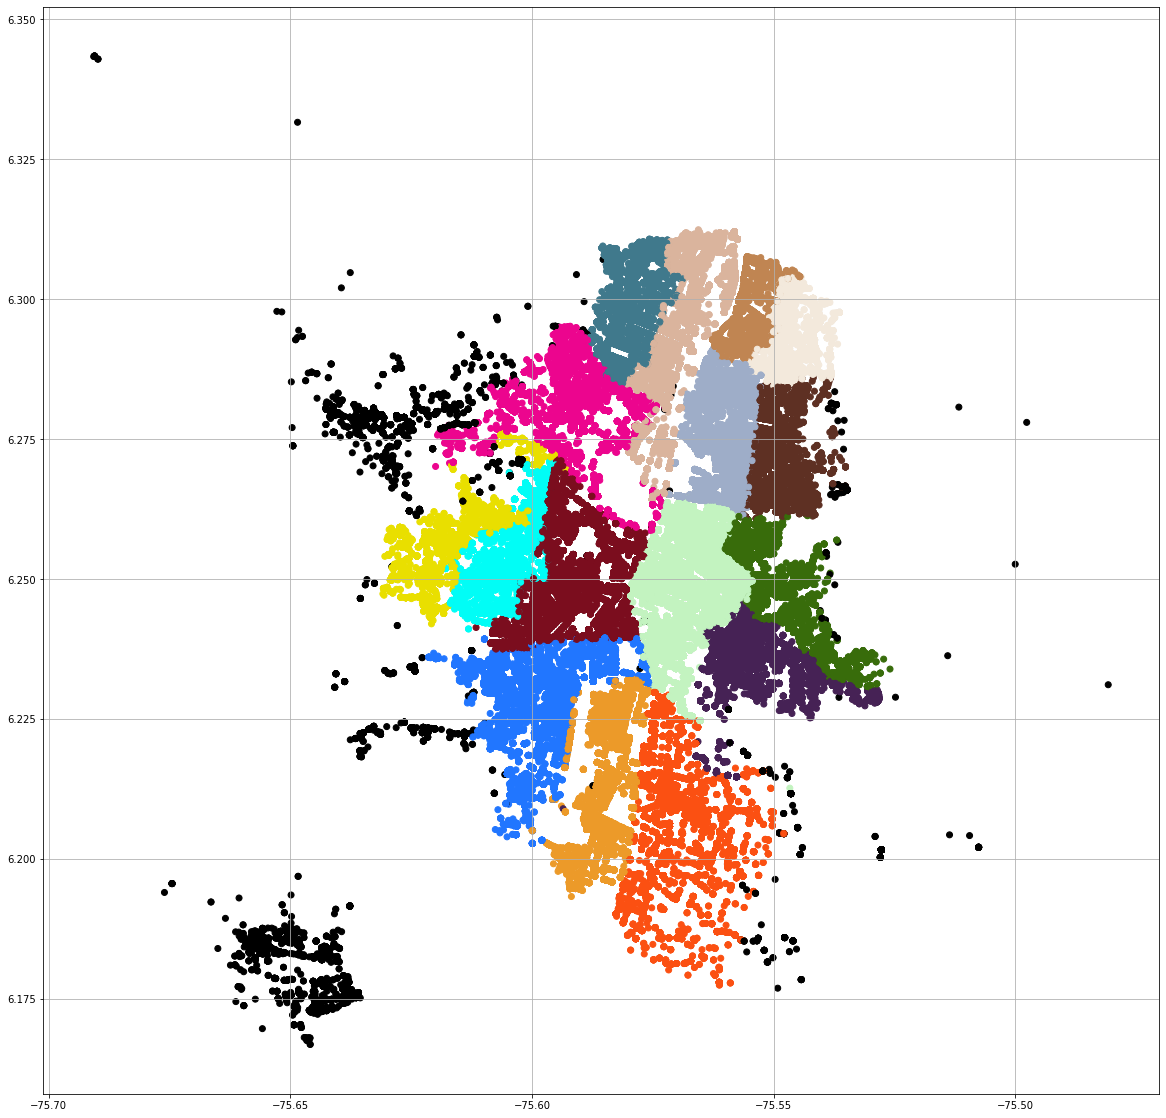

In [ ]:
x = list(df['longitud'])
y = list(df['latitud'])
plt.figure(figsize=(20,20))
plt.scatter(x,y,c=asignacion)
plt.grid()

In [ ]:
dfcopy = df.copy()
dfcopy['colores'] = asignacion 

In [ ]:
dfcopy = dfcopy.set_index('comuna')
dfcopy = dfcopy.drop(['corregimiento de altavista','corregimiento de san antonio de prado',
                    'corregimiento de san cristóbal','corregimiento de san sebastián de palmitas',
                    'corregimiento de santa elena','corregimiento san antorio de prado'], axis=0)

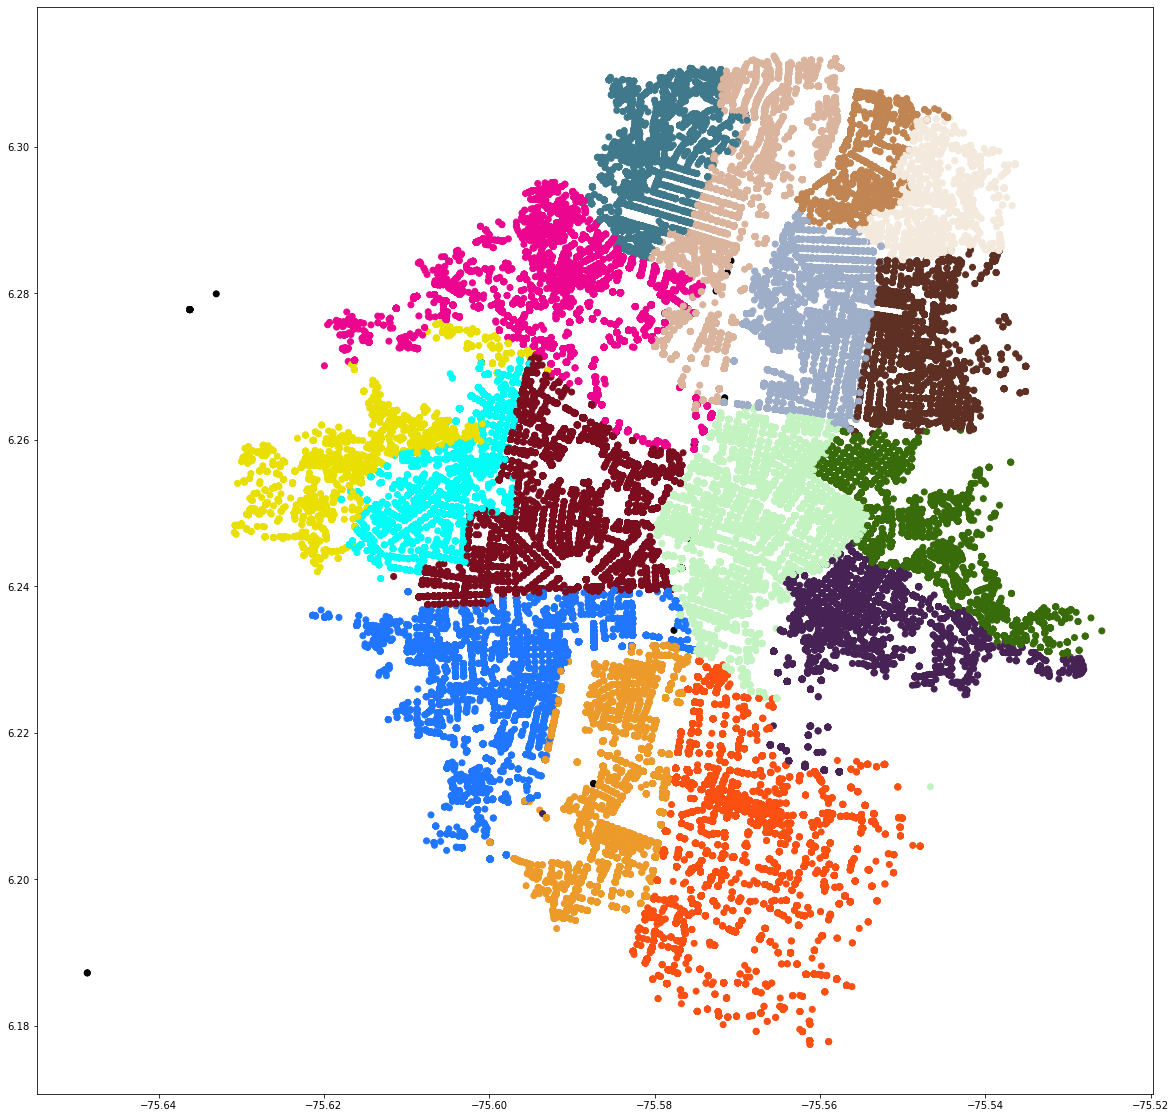

In [ ]:
x = list(dfcopy['longitud'])
y = list(dfcopy['latitud'])
plt.figure(figsize=(20,20))
plt.scatter(x,y,c=list(dfcopy['colores']))

### comuna de los nan


Eston son los puntos que la comuna es nan


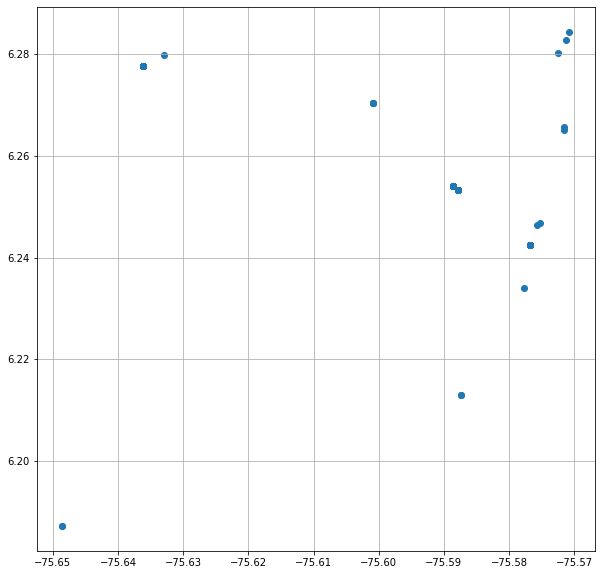

In [ ]:
x = list(dfcopy[dfcopy['colores']=='black']['longitud'])
y = list(dfcopy[dfcopy['colores']=='black']['latitud'])
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.grid()

con esto tenemos la longitud de todos los nan, los 3 primeros puntos se eliminaran ya que al parecer estan en corregimiento que para nuestro trabajo no se tendrán en cuenta

In [ ]:
dfcopy[dfcopy['colores']=='black']['longitud'].sort_values().unique()

array([-75.64861356, -75.63621078, -75.63301607, -75.60092985,
       -75.58854287, -75.58783815, -75.58738011, -75.57765616,
       -75.5767168 , -75.57575682, -75.57521097, -75.57256594,
       -75.57160254, -75.57151301, -75.57121092, -75.57077085])

se divide por la longitud y latitud tentativa al punto que se requiere


In [ ]:
c1 = dfcopy[(dfcopy['longitud']>=-75.60092985) & (dfcopy['longitud']<-75.58854287) & 
       (dfcopy['latitud']>6.26) & (dfcopy['latitud']<6.28)]

se divide por los colores de las comunas que se ven más proximas al punto y se grafica


In [ ]:
c2 = c1[(c1['colores']=='#01FDF6') | (c1['colores']=='#E9DF00') | (c1['colores']=='black')]

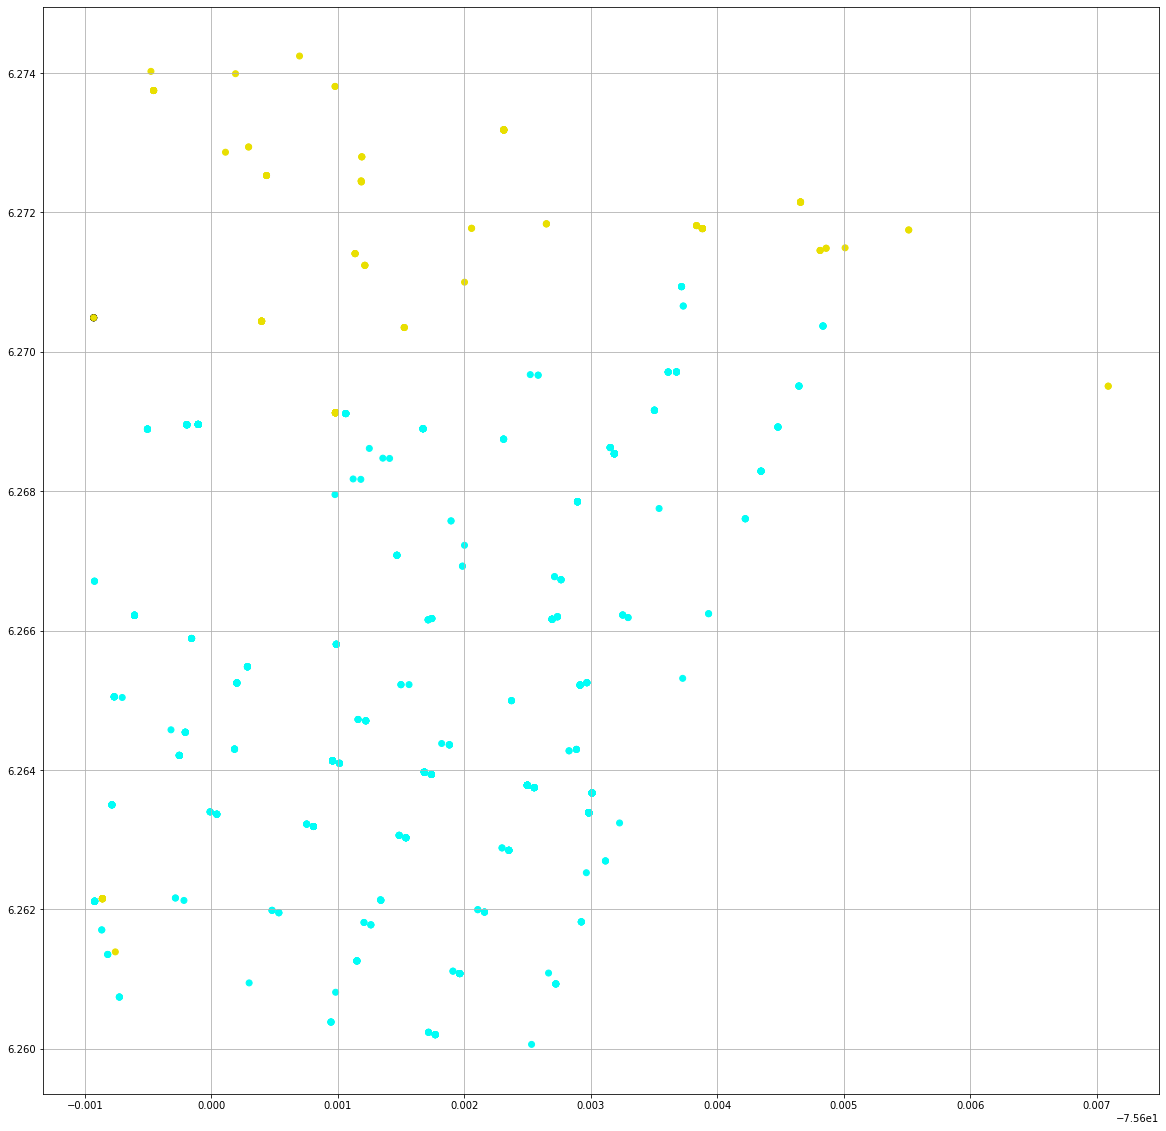

In [ ]:
x = list(c2['longitud'])
y = list(c2['latitud'])
plt.figure(figsize=(20,20))
plt.scatter(x,y,c=list(c2['colores']))
plt.grid()

al parecer el punto esta en la misma posicion de uno de los amarillos, por lo tanto vamos a comprobar si es verdad. Y como se ve acontinuación, los puntos que son NaN en este caso pertenecen a la comuna de **san javier**

In [ ]:
c2.sort_values('longitud')
c2[c2['longitud']==-75.60092985]
#cambiar estos comuna nan por san javier

,fecha,hora,dia,periodo,clase,gravedad,barrio,dia_nombre,mes,longitud,latitud,dia_anno,semana,festivo,colores
comuna,,,,,,,,,,,,,,,
NaN,2014-04-30 00:00:00+00:00,07:15:00,30,2014,choque,herido,sin nombre,miércoles,4,-75.60093,6.270487,120,18,False,black
NaN,2014-10-28 00:00:00+00:00,08:30:00,28,2014,otro,herido,sin nombre,martes,10,-75.60093,6.270487,301,44,False,black
NaN,2015-06-10 00:00:00+00:00,11:50:00,10,2015,otro,herido,sin nombre,miércoles,6,-75.60093,6.270487,161,24,False,black
NaN,2015-06-21 00:00:00+00:00,09:50:00,21,2015,choque,herido,sin nombre,domingo,6,-75.60093,6.270487,172,25,False,black
san javier,2018-08-03 00:00:00+00:00,07:45:00,3,2018,choque,solo daños,sin nombre,viernes,8,-75.60093,6.270487,215,31,False,#E9DF00


In [ ]:
#barrios que no existen

# jardín botánico 
# parque norte 
# universidad de antioquia
# --------
# --------
# barrio caicedo: caicedo
# guayabal -pero tiene comuna buenos aires(debe ser guayabal)
# -------
# cementerio universal 
# oleoducto
# plaza de ferias
# terminal de transporte
# ----
# ----
# el diamante no.2 
# -----
# el rodeo 
# parque juan pablo ii
# ---
# centro administrativo
# corregimiento de santa elena
# hospital san vicente de paúl
# la alpujarra 
# ----
# laureles estadio:laureles
# u.d. atanasio girardot ---talvez es estadio
# u.p.b---probable sea bolivariana
# -----
# manrique---- tiene que ser manrrique central u horiental
# -----
# popular--debe ser 1 o 2


In [ ]:
dfcopy.groupby(['comuna'],dropna=False)['barrio'].unique()[18]

In [ ]:
d = dfcopy.groupby(['comuna','barrio'],dropna=False).count()
d['colores']